In [69]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections as mc
from collections import deque
from itertools import product

# Standard Python Library for working with graphs
import networkx as nx

# Helper library to visualize graphs
import nxpd

# Helper library for community related functions
import community

plt.style.use('ggplot')
%matplotlib inline

import GraphTools as gt

In [3]:
import pandas as pd

In [4]:
ll = pd.read_csv('../processed_data/ll_ones.csv')

In [5]:
ll.shape

(28293931, 3)

In [9]:
ll = ll.iloc[:,:2]

In [10]:
ll.shape

(28293931, 2)

In [21]:
ll.sample(10).values

array([[ 286669,  847733],
       [1163785,  316787],
       [1228644,  845199],
       [1166735,  748545],
       [ 949656,  994895],
       [1178369,  296753],
       [ 150674,  337029],
       [ 699167,  734605],
       [ 726260,  548210],
       [1277230,  933701]])

In [30]:
l = ll.values[:100,:]

In [31]:
l

array([[ 483693,  970524],
       [ 483693, 1153379],
       [ 483693,  187221],
       [ 483693,  758772],
       [ 483693, 1090160],
       [ 483693,  687280],
       [ 483693,  588362],
       [ 483693, 1043143],
       [ 483693,  460491],
       [ 483693,   55499],
       [ 483693, 1070591],
       [ 483693,  173534],
       [ 483693, 1211636],
       [ 483693,   20910],
       [ 483693, 1013325],
       [ 483693,  493827],
       [ 483693,  155244],
       [ 483693, 1100676],
       [ 483693,  293820],
       [ 483693,  997062],
       [ 483693,  324271],
       [ 483693,  903812],
       [ 483693,  625395],
       [ 483693,  629170],
       [ 483693,  904640],
       [ 483693,  634706],
       [ 483693,  553793],
       [ 483693,  497388],
       [ 483693,  856849],
       [ 483693,  345557],
       [ 483693,  636382],
       [ 483693,   87948],
       [ 483693,  181328],
       [ 483693,  628429],
       [ 483693,  364686],
       [ 483693,  349902],
       [ 483693,  202938],
 

In [20]:
# str(ll.sample(10).values).replace("[","(").replace("]",")").replace(" ",",")

'((,129122,1325151)\n,(1147694,,453727)\n,(1036645,1065681)\n,(,,70457,,731510)\n,(,251705,,977632)\n,(1327591,,181286)\n,(,935823,,731810)\n,(,817594,,376978)\n,(1034819,,756916)\n,(,400957,1324264))'

In [24]:
def convert_to_edge(nparray):
    edge_list = []
    for i in range(nparray.shape[0]):
        edge_list.append((l[i,0],l[i,1]))
    return edge_list
    

In [32]:
edge_list = convert_to_edge(l)

In [57]:
edge_list

[(483693, 970524),
 (483693, 1153379),
 (483693, 187221),
 (483693, 758772),
 (483693, 1090160),
 (483693, 687280),
 (483693, 588362),
 (483693, 1043143),
 (483693, 460491),
 (483693, 55499),
 (483693, 1070591),
 (483693, 173534),
 (483693, 1211636),
 (483693, 20910),
 (483693, 1013325),
 (483693, 493827),
 (483693, 155244),
 (483693, 1100676),
 (483693, 293820),
 (483693, 997062),
 (483693, 324271),
 (483693, 903812),
 (483693, 625395),
 (483693, 629170),
 (483693, 904640),
 (483693, 634706),
 (483693, 553793),
 (483693, 497388),
 (483693, 856849),
 (483693, 345557),
 (483693, 636382),
 (483693, 87948),
 (483693, 181328),
 (483693, 628429),
 (483693, 364686),
 (483693, 349902),
 (483693, 202938),
 (483693, 140770),
 (483693, 1084888),
 (483693, 295148),
 (483738, 970524),
 (483738, 1009795),
 (483738, 1365019),
 (483738, 127737),
 (483738, 287638),
 (483738, 287638),
 (483738, 287638),
 (483738, 288051),
 (483738, 54638),
 (483738, 1012761),
 (483738, 467071),
 (483738, 1324264),
 (48

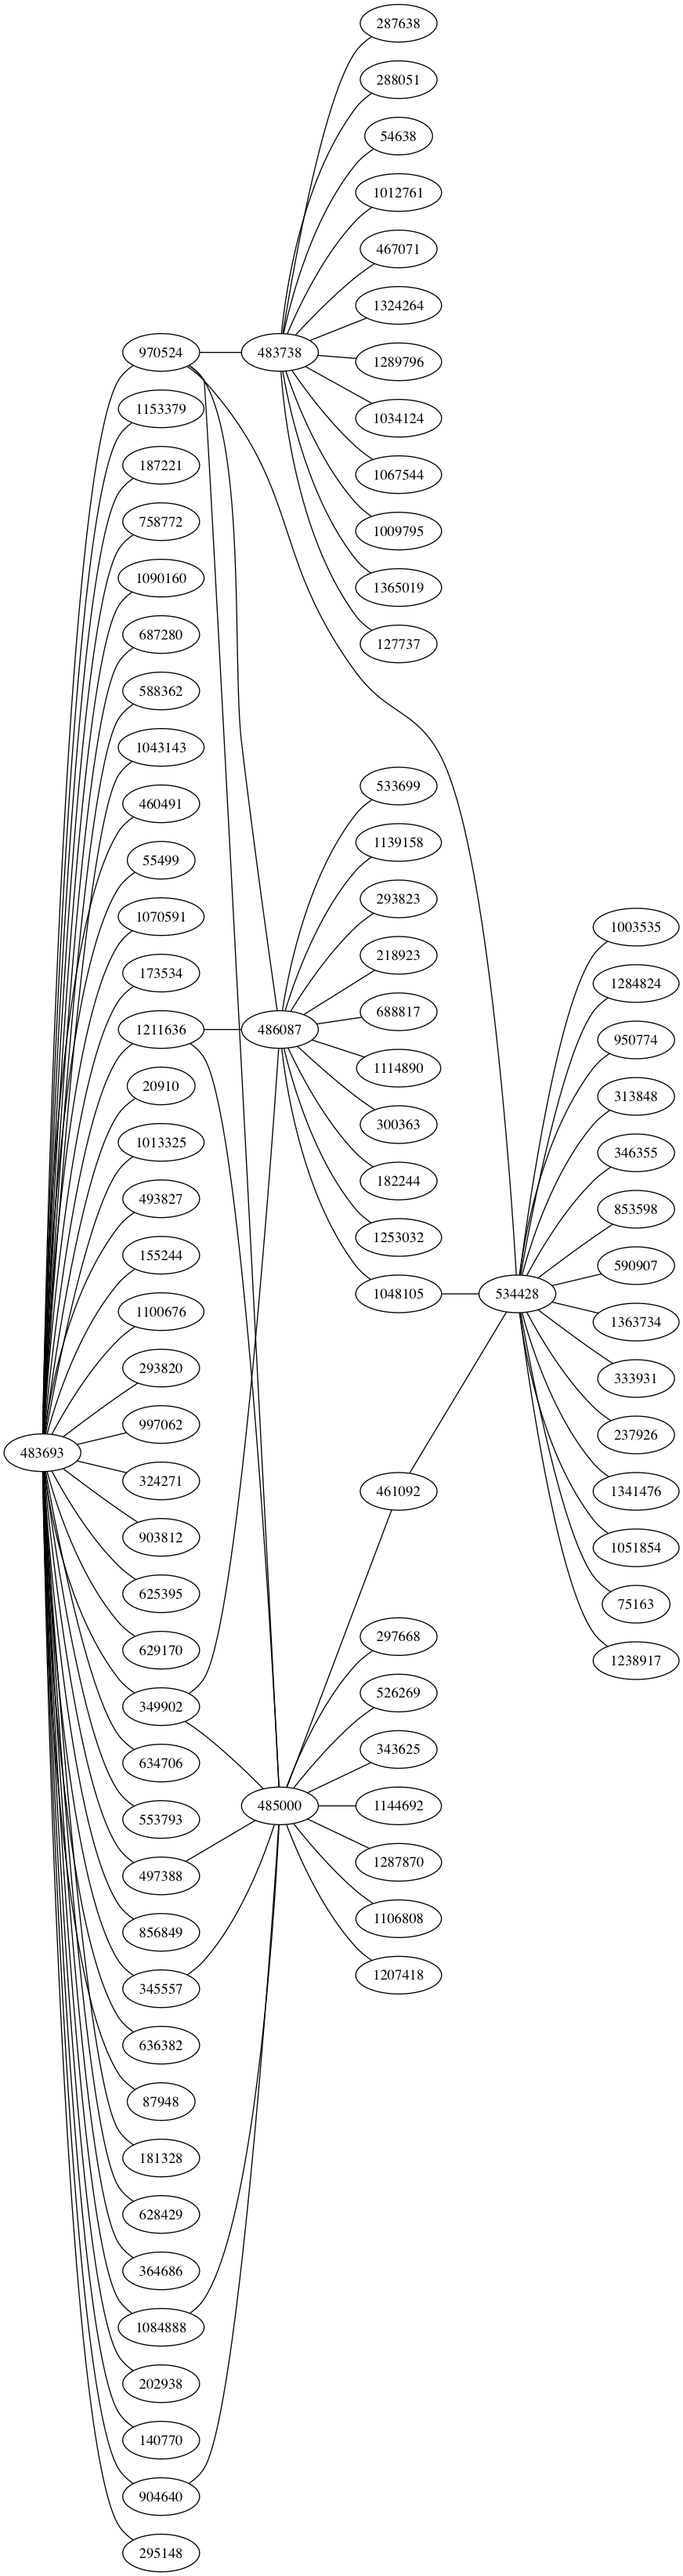

In [33]:
G = nx.from_edgelist(edge_list)
G.graph['rankdir'] = 'LR'
nxpd.draw(G, show='ipynb')

In [35]:
nx.degree_centrality(edge_l)

AttributeError: 'list' object has no attribute 'degree'

In [43]:
degree_centralities = gt.format_dict_of_floats(nx.degree_centrality(G))

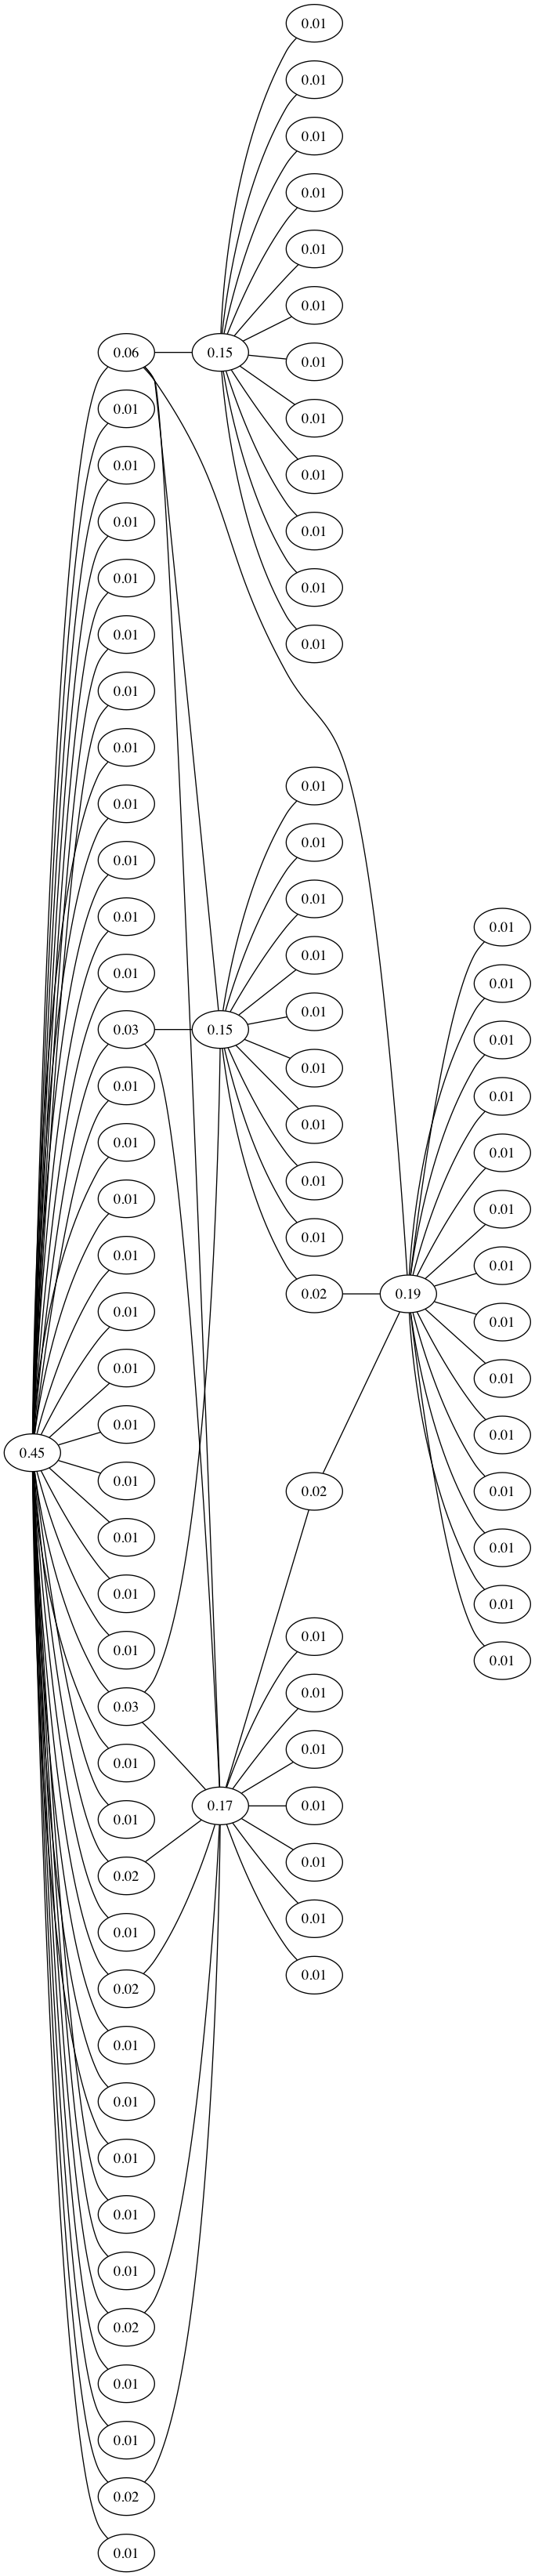

In [44]:
gt.label_nodes(G, degree_centralities)
nxpd.draw(G, show='ipynb')

In [45]:
between_centralities = gt.format_dict_of_floats(nx.betweenness_centrality(G))

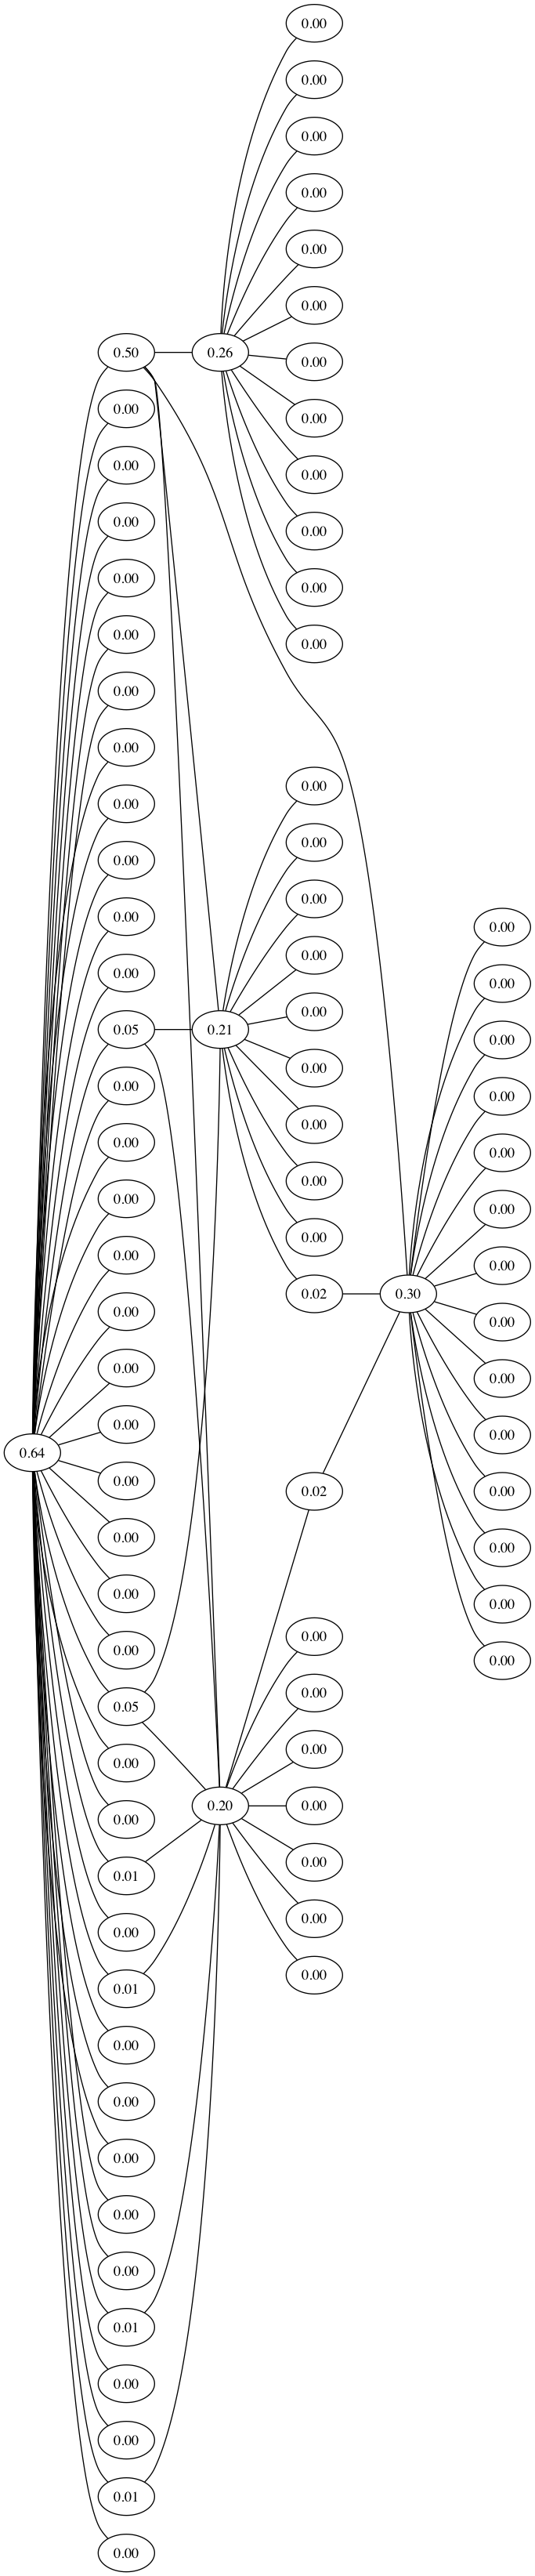

In [47]:
gt.label_nodes(G,between_centralities)
nxpd.draw(G,show='ipynb')

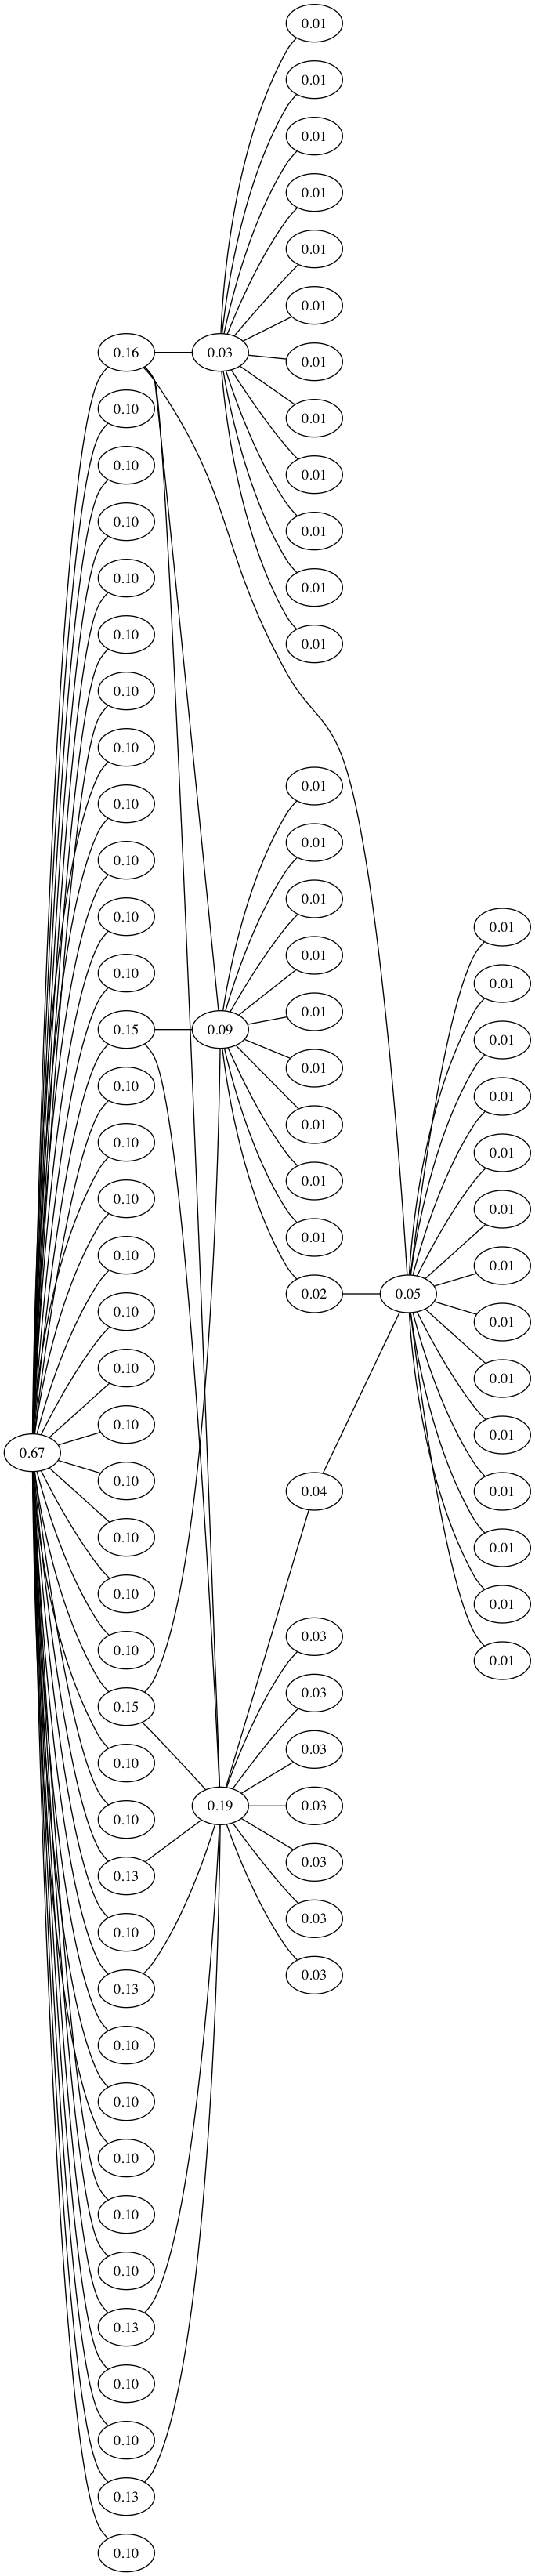

In [48]:
eigen_centralities = gt.format_dict_of_floats(nx.eigenvector_centrality(G))
gt.label_nodes(G, eigen_centralities)
nxpd.draw(G, show='ipynb')

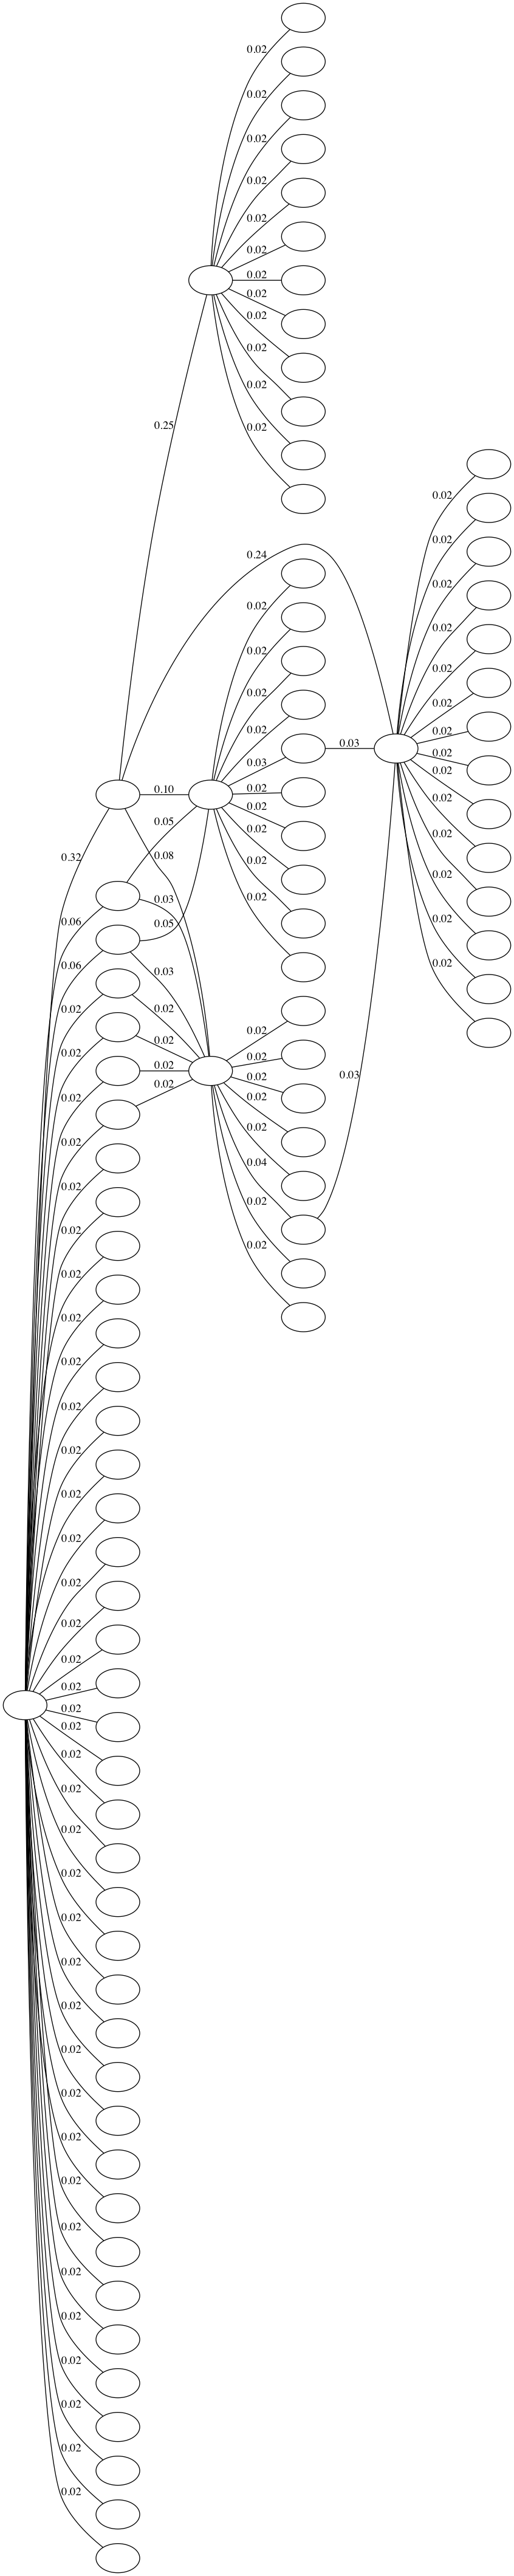

In [50]:
between_centralities = gt.format_dict_of_floats(nx.edge_betweenness_centrality(G))
# gt.reset_graph(G)
gt.label_edges(G, between_centralities)
nxpd.draw(G, show='ipynb')

## directed graph

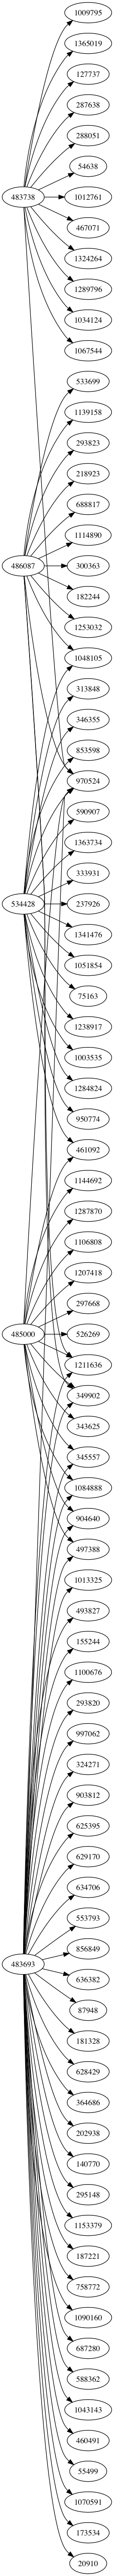

In [65]:
G_dir = nx.DiGraph()
# G_dir.add_cycle(np.unique(l[:,0]))
# G_dir.add_edge(1, 3)
for i in edge_list:
    G_dir.add_edge(i[0],i[1]) 
# for i in 
G_dir.graph['rankdir'] = 'LR'
nxpd.draw(G_dir, show='ipynb')

In [67]:
degree_centralities = gt.format_dict_of_floats(nx.degree_centrality(G_dir))

In [68]:
degree_centralities

{20910: '0.01',
 54638: '0.01',
 55499: '0.01',
 75163: '0.01',
 87948: '0.01',
 127737: '0.01',
 140770: '0.01',
 155244: '0.01',
 173534: '0.01',
 181328: '0.01',
 182244: '0.01',
 187221: '0.01',
 202938: '0.01',
 218923: '0.01',
 237926: '0.01',
 287638: '0.01',
 288051: '0.01',
 293820: '0.01',
 293823: '0.01',
 295148: '0.01',
 297668: '0.01',
 300363: '0.01',
 313848: '0.01',
 324271: '0.01',
 333931: '0.01',
 343625: '0.01',
 345557: '0.02',
 346355: '0.01',
 349902: '0.03',
 364686: '0.01',
 460491: '0.01',
 461092: '0.02',
 467071: '0.01',
 483693: '0.45',
 483738: '0.15',
 485000: '0.17',
 486087: '0.15',
 493827: '0.01',
 497388: '0.02',
 526269: '0.01',
 533699: '0.01',
 534428: '0.19',
 553793: '0.01',
 588362: '0.01',
 590907: '0.01',
 625395: '0.01',
 628429: '0.01',
 629170: '0.01',
 634706: '0.01',
 636382: '0.01',
 687280: '0.01',
 688817: '0.01',
 758772: '0.01',
 853598: '0.01',
 856849: '0.01',
 903812: '0.01',
 904640: '0.02',
 950774: '0.01',
 970524: '0.06',
 9

In [54]:
np.unique(l[:,0])

array([483693, 483738, 485000, 486087, 534428])

In [58]:
i for i in edge_list

[(483693, 970524),
 (483693, 1153379),
 (483693, 187221),
 (483693, 758772),
 (483693, 1090160),
 (483693, 687280),
 (483693, 588362),
 (483693, 1043143),
 (483693, 460491),
 (483693, 55499),
 (483693, 1070591),
 (483693, 173534),
 (483693, 1211636),
 (483693, 20910),
 (483693, 1013325),
 (483693, 493827),
 (483693, 155244),
 (483693, 1100676),
 (483693, 293820),
 (483693, 997062),
 (483693, 324271),
 (483693, 903812),
 (483693, 625395),
 (483693, 629170),
 (483693, 904640),
 (483693, 634706),
 (483693, 553793),
 (483693, 497388),
 (483693, 856849),
 (483693, 345557),
 (483693, 636382),
 (483693, 87948),
 (483693, 181328),
 (483693, 628429),
 (483693, 364686),
 (483693, 349902),
 (483693, 202938),
 (483693, 140770),
 (483693, 1084888),
 (483693, 295148),
 (483738, 970524),
 (483738, 1009795),
 (483738, 1365019),
 (483738, 127737),
 (483738, 287638),
 (483738, 287638),
 (483738, 287638),
 (483738, 288051),
 (483738, 54638),
 (483738, 1012761),
 (483738, 467071),
 (483738, 1324264),
 (48

## Dictionary structure

In [61]:
ls

GraphTools.py                  __pycache__/
Kiva_Matrix.ipynb              graph.ipynb
LightFM.ipynb                  kiva_spark_aws.ipynb
Pandas_ALS_CSR.ipynb           main.py
Spark_local_ALS_samples.ipynb


In [63]:
lll = pd.read_csv('../processed_data/ll.csv')

array([ 970524, 1153379,  187221, ..., 1255499,  547673, 1280377])

In [ ]:
for i in 